**Client:** Mr. Anup Sawant | Digital Outcomes

**Project Details:** Internship Assignment

**Author:** Suryajiraje Bhosale 

**Start Date:** 2022/03/04

**End Date:** 2022/03/05

**Objective:**

    Build a tag cloud of high frequency keywords from Tweets shared by @Tesla in last 1 year 


**Task:**
    
    1. Extract last 1 year tweets from @Tesla using Twitter developer API 
    2. Store the data in a database / CSV 
    3. Process the data if required 
    4. Analyze the keywords in the text data for frequency of occurence 
    5. Form and publish a tag cloud with top 20 keywords based on the frequency 


**Importing required packages and libraries:**

In [233]:
import pandas as pd
import numpy as np 
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import datetime
import pytz
import tweepy as tp
import csv
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/suryabhosale/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Authentication and signing into Tweepy (Twitter API):**

In [234]:
conumer_key = 'eyyGMCdbBDyv7zFs0O8YFKQjR'
consumer_secret = 'AMN6YPqsAdoGNvFcpEz7nJTwrVNzGJvh7ROioWcGcSEGc1iUXR'
bearer_token = "AAAAAAAAAAAAAAAAAAAAACxwZwEAAAAAGOK8PofYBwFk5oq1dq1Zx5TFkTE%3D9IfbfAnUQXRIYXjOQSIzVl27Mbn2mGQyvHvAAOrykLg30tXKS8"

In [235]:
auth = tp.OAuthHandler(consumer_key=conumer_key, consumer_secret=consumer_secret)

In [236]:
at = '1499717854341439491-ZRAuAVtZJ5KFVdNSNtcIPexXXJ70JK'
ats = 'k188RG2SPvXdItuImuPnvDaSNycNrOsDBPnrgTPGWoMxD'

In [237]:
auth.set_access_token(at, ats)

In [238]:
api = api = tp.API(auth, wait_on_rate_limit=True)

In [239]:
api

---

### Extracting Datapoints:

**Task addressed:**
    
    1. Extract last 1 year tweets from @Tesla using Twitter developer API

In [240]:
startDate = datetime.datetime(2021, 3, 4, 0, 0, 0)
endDate =   datetime.datetime(2022, 3, 4, 0, 0, 0)
usrname = 'Tesla'
tweets = []
tmpTweets = api.user_timeline(screen_name = usrname, count = 1000, tweet_mode = "extended")
for tweet in tmpTweets:
    if (tweet.created_at.replace(tzinfo = None) < endDate) and (tweet.created_at.replace(tzinfo = None) > startDate):
        tweets.append(tweet)

In [241]:
texts = {'Date': [], 'Tweet': []}
for tweet in tweets:
    texts['Date'].append(tweet.created_at.replace(tzinfo = None))
    texts['Tweet'].append(tweet.full_text)

---

### Creating Database

**Task addressed:**

    2. Store the data in a database / CSV 

In [242]:
tweet_df = pd.DataFrame(texts)
tweet_df

,Date,Tweet
0,2022-02-22 19:06:53,First Model Y deliveries in the UK https://t.c...
1,2022-02-18 19:25:16,Celebrating our one millionth 4680 cell in Jan...
2,2022-02-17 19:41:04,You can now customize how your Tesla appears o...
3,2022-02-16 12:32:39,RT @TeslaCharging: Non-Tesla vehicles can now ...
4,2022-02-06 00:43:43,RT @elonmusk: Tesla Model S &amp; X Plaid are ...
...,...,...
113,2021-03-25 16:12:35,"6,000+ Superchargers across Europe — at 600 lo..."
114,2021-03-23 22:02:46,RT @Fogdo: Thank you @Tesla for this helpful a...
115,2021-03-16 18:04:04,Backseat views from Model Y\n\n📸 by loghi007 o...
116,2021-03-14 15:47:19,Semi on the track https://t.co/0QCTYGbLJv


In [243]:
print('No. of tweets since 2021/03/04: {}'.format(len(tweet_df.Tweet)))

No. of tweets since 2021/03/04: 118


In [244]:
tweet_df.to_csv('Tesla_Tweets.csv')
tweet_df.to_excel('Tesla_Tweets.xlsx')

----

### Cleaning Tweets For Frequency Analysis

**Task addressed:**

    3. Process the data if required

**Removing https links:**

In [245]:
https_clean_text = []
for text in texts['Tweet']:
    https_clean_text.append(re.sub(r'http\S+', '', text))

In [246]:
https_clean_text

['First Model Y deliveries in the UK ',
 'Celebrating our one millionth 4680 cell in January ',
 'You can now customize how your Tesla appears on the screen and app with the Car Colorizer ',
 'RT @TeslaCharging: Non-Tesla vehicles can now charge at all Superchargers in the Netherlands via the Tesla app.  Learn more at ',
 'RT @elonmusk: Tesla Model S &amp; X Plaid are so fun!',
 'View a breakdown of your charging history and gas savings in the Tesla app ',
 'RT @TeslaCharging: Non-Tesla vehicles can now charge at select Superchargers in France and Norway via the Tesla app. Learn more at ',
 'We started equipment testing at Giga Berlin through the vehicle production process in late 2021 ',
 'Giga Shanghai continues to be our main export hub ',
 'Our Fremont factory achieved record production in 2021 ',
 'In late 2021, we started building Model Ys at Giga Texas. After final certification of Austin-made Model Y, we plan to start deliveries to customers ',
 '2021 was a breakthrough year fo

**Removing Emojis:**

In [247]:
emoji_clean_text = []
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  
        u"\U0001F300-\U0001F5FF"  
        u"\U0001F680-\U0001F6FF"  
        u"\U0001F1E0-\U0001F1FF"  
        u"\U00002500-\U00002BEF"  
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f" 
        u"\u3030"
                      "]+", re.UNICODE)
for text in https_clean_text:
    emoji_clean_text.append(emoji_pattern.sub('', text))

In [248]:
emoji_clean_text

['First Model Y deliveries in the UK ',
 'Celebrating our one millionth 4680 cell in January ',
 'You can now customize how your Tesla appears on the screen and app with the Car Colorizer ',
 'RT @TeslaCharging: Non-Tesla vehicles can now charge at all Superchargers in the Netherlands via the Tesla app.  Learn more at ',
 'RT @elonmusk: Tesla Model S &amp; X Plaid are so fun!',
 'View a breakdown of your charging history and gas savings in the Tesla app ',
 'RT @TeslaCharging: Non-Tesla vehicles can now charge at select Superchargers in France and Norway via the Tesla app. Learn more at ',
 'We started equipment testing at Giga Berlin through the vehicle production process in late 2021 ',
 'Giga Shanghai continues to be our main export hub ',
 'Our Fremont factory achieved record production in 2021 ',
 'In late 2021, we started building Model Ys at Giga Texas. After final certification of Austin-made Model Y, we plan to start deliveries to customers ',
 '2021 was a breakthrough year fo

**Removing Punction:**

In [249]:
punc_clean_text = []
for text in emoji_clean_text:
    punc_clean_text.append(re.sub(r'[^\w\s]', '', text))
punc_clean_text

['First Model Y deliveries in the UK ',
 'Celebrating our one millionth 4680 cell in January ',
 'You can now customize how your Tesla appears on the screen and app with the Car Colorizer ',
 'RT TeslaCharging NonTesla vehicles can now charge at all Superchargers in the Netherlands via the Tesla app  Learn more at ',
 'RT elonmusk Tesla Model S amp X Plaid are so fun',
 'View a breakdown of your charging history and gas savings in the Tesla app ',
 'RT TeslaCharging NonTesla vehicles can now charge at select Superchargers in France and Norway via the Tesla app Learn more at ',
 'We started equipment testing at Giga Berlin through the vehicle production process in late 2021 ',
 'Giga Shanghai continues to be our main export hub ',
 'Our Fremont factory achieved record production in 2021 ',
 'In late 2021 we started building Model Ys at Giga Texas After final certification of Austinmade Model Y we plan to start deliveries to customers ',
 '2021 was a breakthrough year for EVs Thank you t

**Removing \n Marks:**

In [250]:
no_n_text = []
for text in punc_clean_text:
    no_n_text.append(re.sub('\n', '', text))
    

In [251]:
no_n_text

['First Model Y deliveries in the UK ',
 'Celebrating our one millionth 4680 cell in January ',
 'You can now customize how your Tesla appears on the screen and app with the Car Colorizer ',
 'RT TeslaCharging NonTesla vehicles can now charge at all Superchargers in the Netherlands via the Tesla app  Learn more at ',
 'RT elonmusk Tesla Model S amp X Plaid are so fun',
 'View a breakdown of your charging history and gas savings in the Tesla app ',
 'RT TeslaCharging NonTesla vehicles can now charge at select Superchargers in France and Norway via the Tesla app Learn more at ',
 'We started equipment testing at Giga Berlin through the vehicle production process in late 2021 ',
 'Giga Shanghai continues to be our main export hub ',
 'Our Fremont factory achieved record production in 2021 ',
 'In late 2021 we started building Model Ys at Giga Texas After final certification of Austinmade Model Y we plan to start deliveries to customers ',
 '2021 was a breakthrough year for EVs Thank you t

**Removing StopWords:**

In [252]:
cleaned_join = ' '.join(no_n_text)
cleaned = cleaned_join.split(' ')
cleaned

['First',
 'Model',
 'Y',
 'deliveries',
 'in',
 'the',
 'UK',
 '',
 'Celebrating',
 'our',
 'one',
 'millionth',
 '4680',
 'cell',
 'in',
 'January',
 '',
 'You',
 'can',
 'now',
 'customize',
 'how',
 'your',
 'Tesla',
 'appears',
 'on',
 'the',
 'screen',
 'and',
 'app',
 'with',
 'the',
 'Car',
 'Colorizer',
 '',
 'RT',
 'TeslaCharging',
 'NonTesla',
 'vehicles',
 'can',
 'now',
 'charge',
 'at',
 'all',
 'Superchargers',
 'in',
 'the',
 'Netherlands',
 'via',
 'the',
 'Tesla',
 'app',
 '',
 'Learn',
 'more',
 'at',
 '',
 'RT',
 'elonmusk',
 'Tesla',
 'Model',
 'S',
 'amp',
 'X',
 'Plaid',
 'are',
 'so',
 'fun',
 'View',
 'a',
 'breakdown',
 'of',
 'your',
 'charging',
 'history',
 'and',
 'gas',
 'savings',
 'in',
 'the',
 'Tesla',
 'app',
 '',
 'RT',
 'TeslaCharging',
 'NonTesla',
 'vehicles',
 'can',
 'now',
 'charge',
 'at',
 'select',
 'Superchargers',
 'in',
 'France',
 'and',
 'Norway',
 'via',
 'the',
 'Tesla',
 'app',
 'Learn',
 'more',
 'at',
 '',
 'We',
 'started',
 'equ

In [253]:
final = [i for i in cleaned if i.lower() not in stopwords.words('english')]
final

['First',
 'Model',
 'deliveries',
 'UK',
 '',
 'Celebrating',
 'one',
 'millionth',
 '4680',
 'cell',
 'January',
 '',
 'customize',
 'Tesla',
 'appears',
 'screen',
 'app',
 'Car',
 'Colorizer',
 '',
 'RT',
 'TeslaCharging',
 'NonTesla',
 'vehicles',
 'charge',
 'Superchargers',
 'Netherlands',
 'via',
 'Tesla',
 'app',
 '',
 'Learn',
 '',
 'RT',
 'elonmusk',
 'Tesla',
 'Model',
 'amp',
 'X',
 'Plaid',
 'fun',
 'View',
 'breakdown',
 'charging',
 'history',
 'gas',
 'savings',
 'Tesla',
 'app',
 '',
 'RT',
 'TeslaCharging',
 'NonTesla',
 'vehicles',
 'charge',
 'select',
 'Superchargers',
 'France',
 'Norway',
 'via',
 'Tesla',
 'app',
 'Learn',
 '',
 'started',
 'equipment',
 'testing',
 'Giga',
 'Berlin',
 'vehicle',
 'production',
 'process',
 'late',
 '2021',
 '',
 'Giga',
 'Shanghai',
 'continues',
 'main',
 'export',
 'hub',
 '',
 'Fremont',
 'factory',
 'achieved',
 'record',
 'production',
 '2021',
 '',
 'late',
 '2021',
 'started',
 'building',
 'Model',
 'Ys',
 'Giga',
 'Te

---

### Commencing Analysis:

**Task addressed:**

    4. Analyze the keywords in the text data for frequency of occurence 

In [156]:
freq1 = nltk.FreqDist(final)
top20 = freq1.most_common(21)[1:]
top20_df = pd.DataFrame(top20, columns=['Word', 'Frequency'])

In [205]:
top20_df.to_excel('Top20Words.xlsx')
top20_df

,Word,Frequency
0,Tesla,42
1,RT,39
2,elonmusk,23
3,Model,19
4,amp,18
5,Plaid,14
6,Solar,10
7,Giga,9
8,vehicles,8
9,Superchargers,8


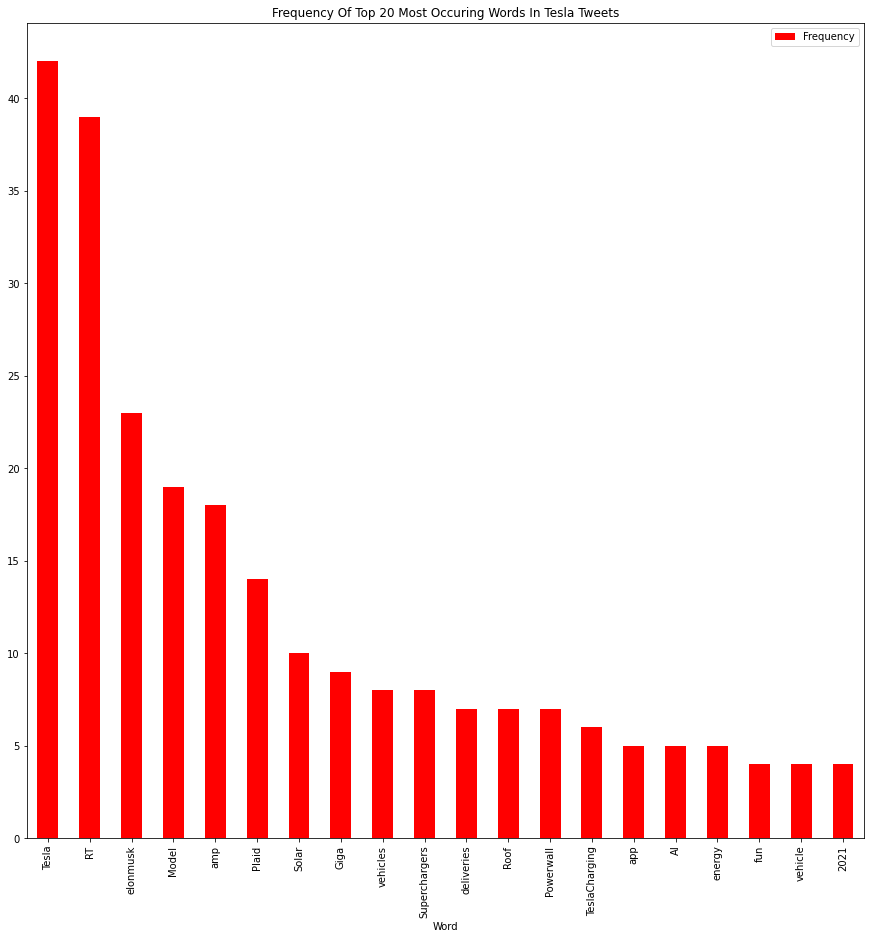

In [162]:
top20_df.plot(x='Word', y='Frequency', kind = 'bar', figsize = (15,15), color = 'red')
plt.title('Frequency Of Top 20 Most Occuring Words In Tesla Tweets')
plt.savefig('word_freq_top20')
plt.show()

----

### Creating WordCloud

**Tasks addressed:**
    
    5. Form and publish a tag cloud with top 20 keywords based on the frequency

In [266]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,background_color ='white',stopwords = stopwords,
                min_font_size = 10, max_words=21).generate_from_frequencies(freq1)

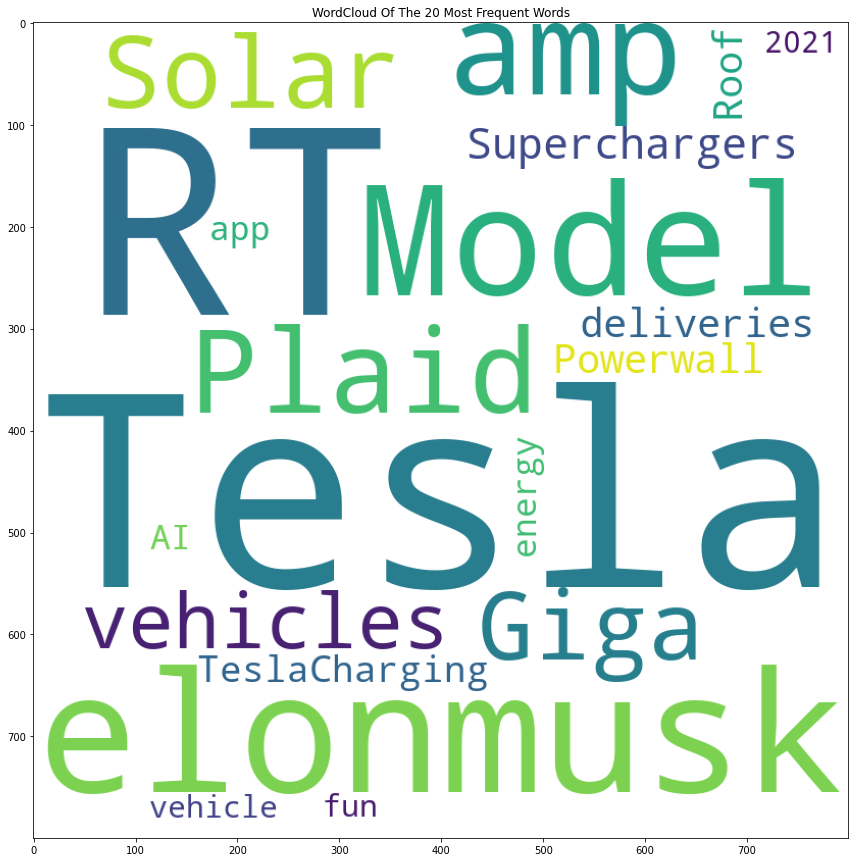

In [267]:
plt.figure(figsize=(15,15))
plt.title('WordCloud Of The 20 Most Frequent Words')
plt.imshow(wordcloud)
plt.show()